This block of code imports the necessary libraries for the notebook. OpenCV is used for image processing, Numpy is used for numerical operations, Keras is used for building deep learning models, and the MNIST dataset is used for training the model.

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical

This block of code loads the MNIST dataset which is a dataset of handwritten digits and splits it into training and test sets.

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


This block of code reshapes and normalizes the data to prepare it for use in a CNN. The data is reshaped to have the shape (number of images, 28, 28, 1) and is normalized by dividing it by 255.

In [ ]:
# Reshape and normalize the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# One hot encode the target data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

This block of code creates a simple CNN model using the Keras library. The model consists of a convolutional layer, a max pooling layer, a flatten layer, a dense layer with 128 neurons and relu activation function, and an output layer with 10 neurons and softmax activation function. The input shape is set to (28, 28, 1) which is the shape of the MNIST images after reshaping.

In [ ]:
# Create a CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

This block of code compiles the model with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

This block of code trains the model on the training data for 10 epochs with a batch size of 128.

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 11s 4ms/step - loss: 0.2227 - accuracy: 0.9375
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0694 - accuracy: 0.9796
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0463 - accuracy: 0.9862
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0355 - accuracy: 0.9898
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0259 - accuracy: 0.9923


This block of code evaluates the model on the test data and prints the test loss and accuracy.



In [ ]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.040793586522340775
Test accuracy: 0.9857000112533569


 applies image processing techniques to an image, including reading an image from a file, converting it to grayscale, applying a Gaussian blur, and applying Canny edge detection.

In [ ]:
# Load an image
img = cv2.imread("/content/image2.png")
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply a Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blurred, 50, 150)
print(edges)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


displays the image with edges using OpenCV's imshow function and waits for a key press to close the window. The `cv2.imshow()` function is used to display an image, the `cv2.waitKey(0`) function is used to wait for a key press, and the `cv2.destroyAllWindows()` function is used to close all open windows.

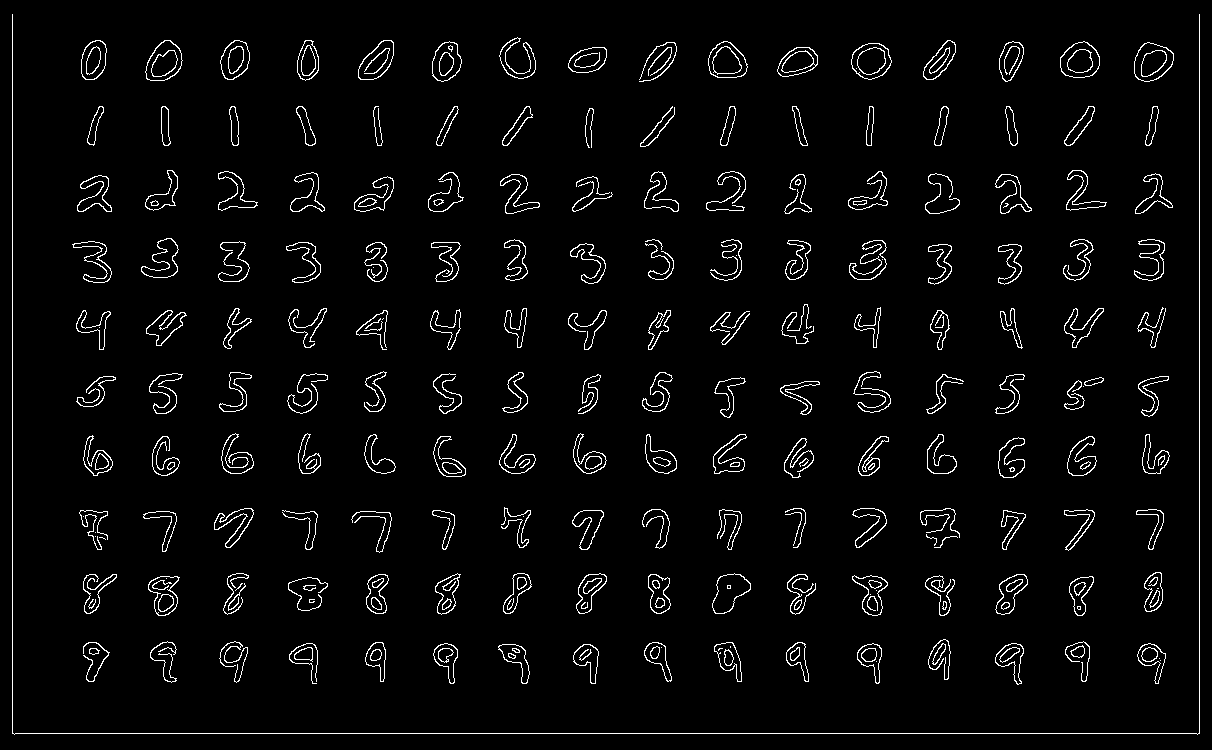

In [ ]:
from google.colab.patches import cv2_imshow
# Display the image
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()